In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full_data = [train, test]

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
for dataset in full_data:
    dataset['Family size'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [33]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family size'] == 1, 'IsAlone'] = 1
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [34]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,IsAlone
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,1
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,3,0


# Look at each variable

## 1. Pclass

In [35]:
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


## 2. Sex

In [36]:
print(train[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [37]:
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1}).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,1


## 3. Age

In [38]:
for dataset in full_data:
    ave_age = dataset['Age'].mean()
    std_age = dataset['Age'].std()
    null_count = dataset['Age'].isnull().sum()
    
    null_random_list = np.random.randint(ave_age - std_age, ave_age + std_age, size=null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)
print(train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'],as_index=False).mean())

/Users/bai/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


  CategoricalAge  Survived
0  (-0.08, 16.0]  0.509091
1   (16.0, 32.0]  0.354545
2   (32.0, 48.0]  0.379310
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [39]:
for dataset in full_data:
    dataset.loc[dataset['Age'] <= 16.0, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16.0) & (dataset['Age'] <= 32.0), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32.0) & (dataset['Age'] <= 48.0), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48.0) & (dataset['Age'] <= 64.0), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64.0) & (dataset['Age'] <= 80.0), 'Age'] = 4
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,IsAlone,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,2,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,C,2,0,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S,2,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S,1,1,"(32.0, 48.0]"


## 4. Family size

In [40]:
print(train[['Family size', 'Survived']].groupby(['Family size'], as_index=False).mean())

   Family size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


## 5. Fare

In [41]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null int64
Age               891 non-null int64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          891 non-null object
Family size       891 non-null int64
IsAlone           891 non-null int64
CategoricalAge    891 non-null category
dtypes: category(1), float64(1), int64(9), object(4)
memory usage: 98.5+ KB
None


In [42]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Family size    418 non-null int64
IsAlone        418 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 42.5+ KB
None


In [43]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print(train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [44]:
for dataset in full_data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31.0) & (dataset['Fare'] <= 512.329), 'Fare'] = 3
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,IsAlone,CategoricalAge,CategoricalFare
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0.0,NaN,S,2,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3.0,C85,C,2,0,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1.0,NaN,S,1,1,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3.0,C123,S,2,0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1.0,NaN,S,1,1,"(32.0, 48.0]","(7.91, 14.454]"


## 6. Cabin

In [45]:
for dataset in full_data:
    dataset['HasCabin'] = dataset['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,IsAlone,CategoricalAge,CategoricalFare,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0.0,NaN,S,2,0,"(16.0, 32.0]","(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3.0,C85,C,2,0,"(32.0, 48.0]","(31.0, 512.329]",1
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1.0,NaN,S,1,1,"(16.0, 32.0]","(7.91, 14.454]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3.0,C123,S,2,0,"(32.0, 48.0]","(31.0, 512.329]",1
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1.0,NaN,S,1,1,"(32.0, 48.0]","(7.91, 14.454]",0


## 7. Embarked

In [46]:
for dataset in full_data:
    embark_map = {'C':0, 'Q':1, 'S':2}
    dataset['Embarked'] = dataset['Embarked'].map(embark_map).astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,IsAlone,CategoricalAge,CategoricalFare,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0.0,NaN,2,2,0,"(16.0, 32.0]","(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3.0,C85,0,2,0,"(32.0, 48.0]","(31.0, 512.329]",1
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1.0,NaN,2,1,1,"(16.0, 32.0]","(7.91, 14.454]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3.0,C123,2,2,0,"(32.0, 48.0]","(31.0, 512.329]",1
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1.0,NaN,2,1,1,"(32.0, 48.0]","(7.91, 14.454]",0


## 8. Title

In [47]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,IsAlone,CategoricalAge,CategoricalFare,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0.0,NaN,2,2,0,"(16.0, 32.0]","(-0.001, 7.91]",0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3.0,C85,0,2,0,"(32.0, 48.0]","(31.0, 512.329]",1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1.0,NaN,2,1,1,"(16.0, 32.0]","(7.91, 14.454]",0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3.0,C123,2,2,0,"(32.0, 48.0]","(31.0, 512.329]",1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1.0,NaN,2,1,1,"(32.0, 48.0]","(7.91, 14.454]",0,Mr


In [48]:
print(pd.crosstab(train['Title'], train['Sex']))

Sex         0    1
Title             
Capt        0    1
Col         0    2
Countess    1    0
Don         0    1
Dr          1    6
Jonkheer    0    1
Lady        1    0
Major       0    2
Master      0   40
Miss      182    0
Mlle        2    0
Mme         1    0
Mr          0  517
Mrs       125    0
Ms          1    0
Rev         0    6
Sir         0    1


In [49]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [50]:
title_map = {'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Rare':4}
for dataset in full_data:
    dataset['Title'] = dataset['Title'].map(title_map).astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size,IsAlone,CategoricalAge,CategoricalFare,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0.0,NaN,2,2,0,"(16.0, 32.0]","(-0.001, 7.91]",0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3.0,C85,0,2,0,"(32.0, 48.0]","(31.0, 512.329]",1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1.0,NaN,2,1,1,"(16.0, 32.0]","(7.91, 14.454]",0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3.0,C123,2,2,0,"(32.0, 48.0]","(31.0, 512.329]",1,3
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1.0,NaN,2,1,1,"(32.0, 48.0]","(7.91, 14.454]",0,2


# Data cleaning

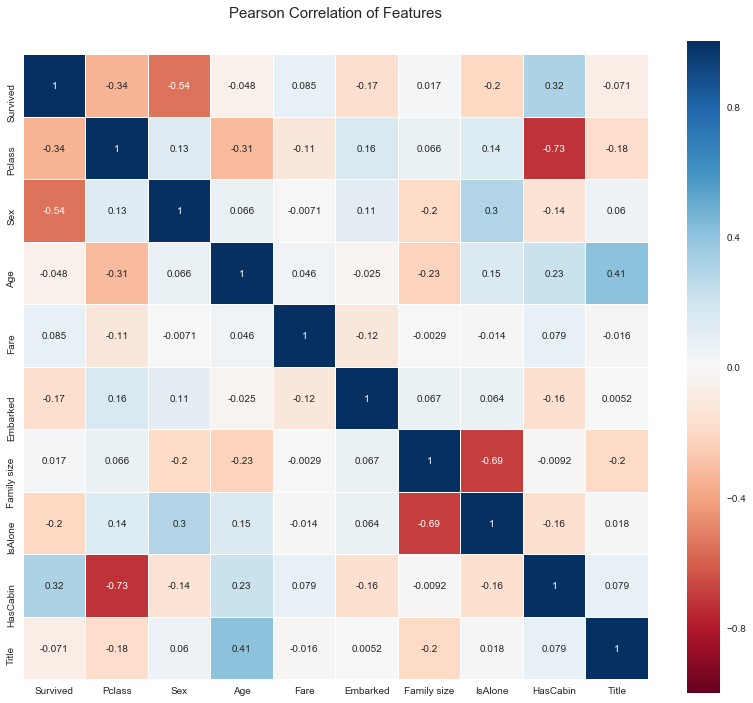

In [51]:
PassengerId = test['PassengerId']
drop_elements = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
train = train.drop(drop_elements, axis=1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis=1)
test = test.drop(drop_elements, axis=1)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

train = train.values
test = test.values



# Run classifier

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

classifiers = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),\
              LogisticRegression()]

log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[:, 1:]
Y = train[:, 0]

acc_dict = {}
feature_importance = {}

for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, Y_train)
        fi = clf.feature_importances(X_train, Y_train)
        predict = clf.predict(X_test)
        acc = accuracy_score(Y_test, predict)
        if name in acc_dict:
            acc_dict[name] += acc
            feature_importance[name] += fi
        else:
            acc_dict[name] = acc
            feature_importance[name] = fi
            
for clf in acc_dict:
    acc_dict[clf] /= 10.0
    feature_importance[clf] /= 10.0
    entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(entry)
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

log.head(10)

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_importances'

In [ ]:
# Feature importance

# Predict

In [24]:
classifier = GradientBoostingClassifier()
classifier.fit(X, Y)
result = classifier.predict(test).astype(int)

submit = pd.DataFrame({'PassengerId':PassengerId, 'Survived':result})
submit.to_csv('submit.csv', index=False)

# Try NN

In [25]:
from keras import layers
from keras.layers import Input, Dense, Activation
from keras.models import Model

def model_titanic(input_shape):
    X_input = Input(input_shape)
    X = Dense(10, activation='relu')(X_input)
    X = Dense(10, activation='relu')(X)
    X = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs=X_input, outputs=X)
    
    return model

acc = 0.0
for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    model = model_titanic((X_train.shape[1],))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(x=X_train, y=Y_train, epochs=30, batch_size=30, verbose=0)
    pred = model.evaluate(x=X_test, y=Y_test, verbose=0)
    acc += pred[1]
        
acc /= 10.0
print(acc)
    

Using TensorFlow backend.


0.79444444418


# Try 2 step classifier

In [26]:
select_classifiers = [SVC(probability=True), RandomForestClassifier(), AdaBoostClassifier(), \
                    GradientBoostingClassifier()]

layer2_train = {}
layer2_test = {}
for clf in select_classifiers:
    name = clf.__class__.__name__
    clf.fit(X, Y)
    predict = clf.predict(X)
    layer2_train[name] = predict
    predict = clf.predict(test)
    layer2_test[name] = predict
    
train2 = pd.DataFrame(layer2_train)
test2 = pd.DataFrame(layer2_test)

train2.head()

,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,SVC
0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0


In [27]:
train2 = train2.values
test2 = test2.values

acc = 0.0
for train_index, test_index in sss.split(train2, Y):
    X2_train, X2_test = train2[train_index], train2[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clf = XGBClassifier()
    clf.fit(X2_train, Y_train)
    predict = clf.predict(X2_test)
    acc = acc + accuracy_score(Y_test, predict)
    
acc /= 10.0
print(acc)

0.903333333333


In [28]:
result = clf.predict(test2).astype(int)

submit = pd.DataFrame({'PassengerId':PassengerId, 'Survived':result})
submit.to_csv('submit2.csv', index=False)